# Разделимость данных

Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта
1. Примените алгоритм кластеризации к спроецированным данным. Расчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции
1. Опишите результаты 

In [298]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
import pandas as pd

In [299]:
spotify = pd.read_csv('./SpotifyFeatures.csv')

In [300]:
def discretize(popularity):
    if (popularity < 20):
        return 1
    if (popularity > 50):
        return 3
    else:
        return 2

spotify['popularity_place'] = spotify.popularity.apply(discretize)
spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_place
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,1
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,1
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1


In [301]:
short_spotify = spotify.sample(n = 10000, ignore_index = True)
X = short_spotify.drop(['genre', 'artist_name', 'track_name', 'track_id', 'key', 'time_signature', 'mode', 'popularity', 'popularity_place', 'mode'], axis=1)
y = short_spotify.popularity_place

In [ ]:
X.head()

In [314]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors = 15, min_dist = 0.3, random_state=42)
reducer.fit(X)

UMAP(min_dist=0.3, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [315]:
import numpy as np
X_reduced = reducer.transform(X)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(X_reduced == reducer.embedding_))
X_reduced.shape

(10000, 2)

Projecting 10-dimensional data to 2D


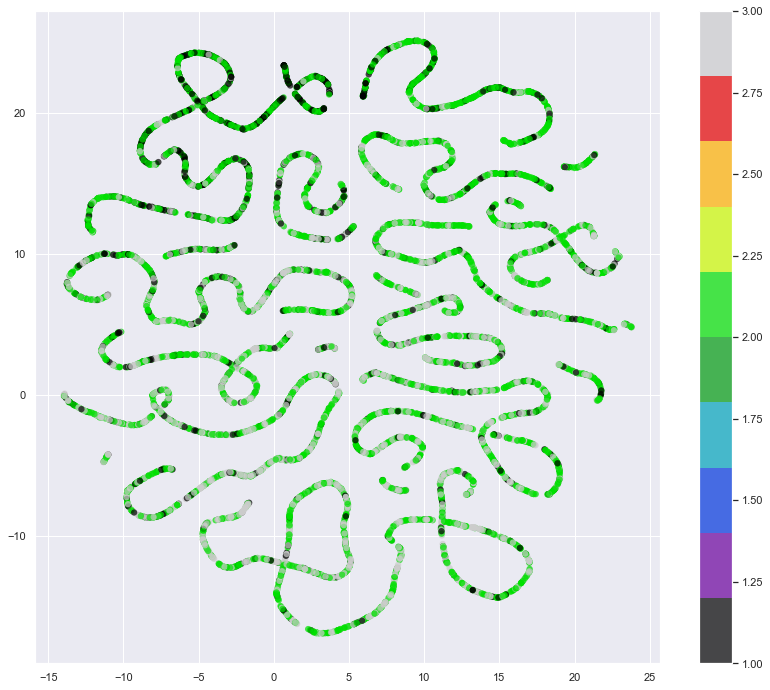

In [316]:
#plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
#plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
#plt.title('UMAP projection of the Digits dataset', fontsize=24);
import matplotlib.pyplot as plt

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(14,12))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [317]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)
y_kmeans = kmeans.predict(X_reduced)

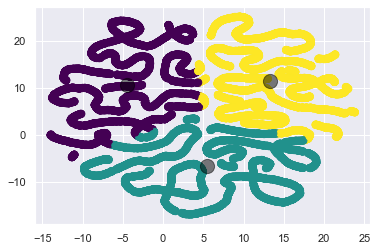

In [318]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [319]:
def F0():
    sum = 0
    cnt = 0
    ans = 0
    for i in range (len(y_kmeans)):
        for j in range (i):
            if y_kmeans[i] == y_kmeans[j]:
                sum += distance.euclidean(X_reduced[i], X_reduced[j])
                cnt += 1
    return sum / cnt

In [320]:
def F1():
    sum = 0
    cnt = 0
    ans = 0
    for i in range (len(y_kmeans)):
        for j in range (i):
            if y_kmeans[i] != y_kmeans[j]:
                sum += distance.euclidean(X_reduced[i], X_reduced[j])
                cnt += 1
    return sum / cnt

In [321]:
f0 = F0()
f1 = F1()

In [322]:
print(f'F0: {f0}, F1: {f1}, F0/F1: {f0/f1}')

F0: 10.859384841547314, F1: 21.40223712809971, F0/F1: 0.5073948473961007
